In [4]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

# Load your CSV file
df = pd.read_csv('Data/Cleaned/sanitized_property_listings_Kelli.csv')

# Check if df is None
if df is None:
    print("DataFrame not loaded correctly, df is None.")
else:
    print("DataFrame loaded successfully.")

# Display the first few rows in a more readable format
display(df.head(10))

# Check the shape of the DataFrame
print(df.shape)  # This will display the shape of the DataFrame


DataFrame loaded successfully.


,Unnamed: 0,Property ID,Locality data,Price,Property type,Number of bedrooms,Living area m²,Equipped kitchen,Furnished,Open fire,Terrace surface m²,Garden area m²,Number of facades,Swimming pool,Building condition
0,0,20245694,9550,198800,house,3.0,125.0,0,0,1,45.0,106.0,2.0,0,To renovate
1,1,20246399,2170,349000,house,3.0,193.0,1,0,1,NaN,53.0,2.0,0,To be done up
2,2,20245215,4102,199900,house,3.0,131.0,1,0,1,40.0,30.0,2.0,0,As new
3,3,20245396,9620,349000,house,4.0,237.0,0,0,1,16.0,390.0,4.0,0,To renovate
4,4,20245133,1200,795000,house,5.0,225.0,1,0,1,15.0,120.0,2.0,0,To renovate
5,5,20244275,8500,455000,house,4.0,187.0,1,0,1,NaN,100.0,NaN,0,Good
6,6,20244687,9860,455000,house,3.0,147.0,0,0,1,16.0,77.0,3.0,0,Just renovated
7,7,20241273,6220,315000,house,2.0,100.0,0,0,1,14.0,1030.0,4.0,0,To be done up
8,8,20242318,1120,477000,house,5.0,186.0,0,0,1,30.0,120.0,2.0,0,As new
9,9,20244297,4140,298000,house,4.0,242.0,1,0,1,80.0,147.0,2.0,0,Good


(10114, 15)


### Further data cleaning

In [36]:
df.drop(labels=['Number of facades'], axis=1, inplace=True)

In [5]:
# Drop rows with NaN in specific columns without assignment
df.dropna(subset=['Living area m²', 'Number of bedrooms', 'Building condition'], inplace=True)

# Check the new shape of df
print(df.shape)


(9033, 15)


### Boxplot to identify outliers

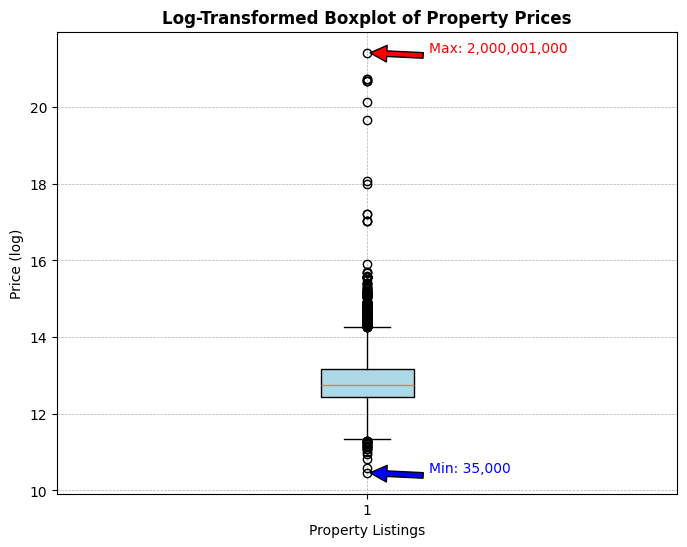

In [64]:
min_price = df['Price'].min()
max_price = df['Price'].max()

log_min_price = np.log1p(min_price)
log_max_price = np.log1p(max_price)

# Log-transform the 'Price' column (add 1 to avoid log(0))
log_price = np.log1p(df['Price'])

# Create a boxplot for the log-transformed prices
plt.figure(figsize=(8, 6))

# Boxplot with custom color
box = plt.boxplot(log_price, vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Add gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Correct axis labels
plt.title('Log-Transformed Boxplot of Property Prices', weight='bold')
plt.ylabel('Price (log)')
plt.xlabel('Property Listings')

# Annotate the approximate max and min prices on the plot

plt.annotate(f'Max: {int(max_price):,}', xy=(1, log_max_price), xytext=(1.1, log_max_price),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10, color='red')

plt.annotate(f'Min: {int(min_price):,}', xy=(1, log_min_price), xytext=(1.1, log_min_price),
             arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=10, color='blue')

# Show the plot
plt.show()

